# Beamline

This is an example of plotting lines and surveys.
First, create a simple line and a tracker:

In [1]:
import xtrack as xt
import xpart as xp
import xplt
import numpy as np

np.random.seed(36963142)

In [2]:
## Generate a simple 6-fold symmetric FODO lattice

n = 6  # number of sections
s = 5  # number of dipole slices
elements = {
    "QF": xt.Multipole(length=0.3, knl=[0, +0.63]),
    "QD": xt.Multipole(length=0.3, knl=[0, -0.48]),
    "MU": xt.Multipole(length=0.5, knl=[np.pi / n], hxl=[np.pi / n]),
}
parts = {
    "a": [xt.Node(0.7, "QF"), xt.Node(1.4, "MU"), xt.Node(2.1, "QD"), xt.Node(2.8, "MU")],
    "b": [xt.Node(2.2, "MU"), xt.Node(2.9, "QD"), xt.Node(3.6, "MU"), xt.Node(4.3, "QF")],
}
nodes = [xt.Node(5.0 * i, "a" if i % 2 else "b", name=f"S{i+1}") for i in range(n)]

# sextupoles
for i in range(n):
    sx = xt.Multipole(length=0.2, knl=[0, 0, 0.5 * np.sin(2 * np.pi * (i / n))])
    nodes.append(xt.Node(0.2, sx, from_=f"S{i+1}", name=f"S{i+1}SX"))

line = xt.Line.from_sequence(
    nodes, length=5.0 * n, sequences=parts, elements=elements, auto_reorder=True
)
line.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=1e9)
tracker = xt.Tracker(line=line)

Found suitable prebuilt kernel `default_only_xtrack`.


## Survey

Create a survey and a default floor plan plot:

In [3]:
survey = tracker.survey()

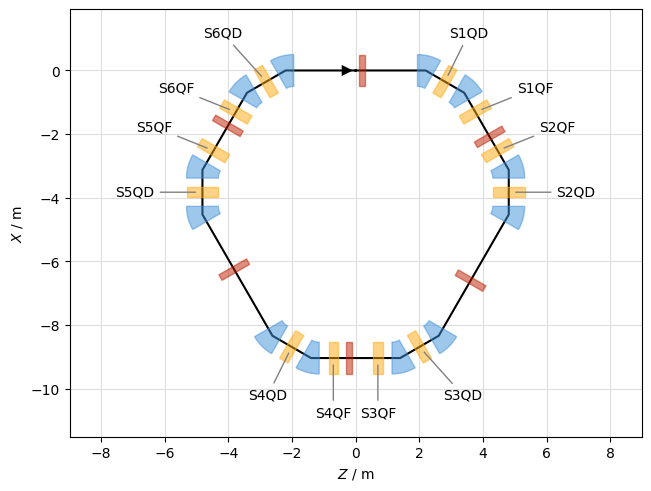

In [4]:
plot = xplt.FloorPlot(survey, line, labels="S.Q.")

Customize the plot:

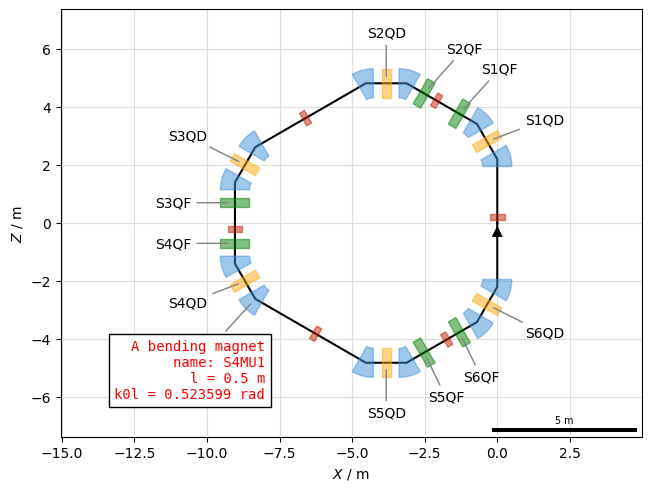

In [5]:
plot = xplt.FloorPlot(
    survey,
    line,
    projection="XZ",
    boxes={  # adjust box style for element names matching regex
        "S.QF": dict(color="green"),
        "S.SX": dict(width=0.5),
        "S...": True,  # default style for other elements
    },
    labels={  # adjust labels for element names matching regex
        "S.Q.": True,  # default labels
        "S4MU1": dict(
            text="A bending magnet\nname: {name}\nl = {element.length} m\nk0l = {element.knl[0]:g} rad",
            xytext=(-8, -4),
            bbox={"fc": "white"},
            font="monospace",
            c="red",
        ),
    },
)
plot.add_scale()

## Multipole strength

A plot of the multipole strength $k_nl$ as function of s-coordinate:

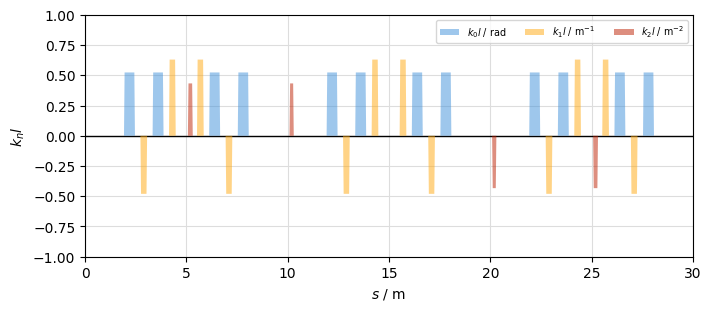

In [6]:
plot = xplt.KnlPlot(line, figsize=(7, 3))
plot.ax.set(ylim=(-1, 1));

-----------------
```{seealso}
- {class}`xplt.line`
```